##### Copyright 2021 The TF-Agents Authors.

## Setup

To render video you will need to have ffmpeg and xvbf installed.
Typically, installing is done with the command

`sudo apt-get install -y xvfb ffmpeg`

Then, if you haven't installed the following dependencies, run:

In [1]:
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install gym

In [2]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import gym

In [3]:
# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

## Environment


In [4]:
# env_name = 'CartPole-v0'                # discrete action space
# env_name = 'LunarLander-v2'             # discrete action space
# env_name = 'LunarLanderContinuous-v2'   # continuous action space
# env_name = 'BipedalWalker-v3'           # continuous action space
env_name = 'BipedalWalkerHardcore-v3'     # continuous action space
env = gym.make(env_name)

/home/cwilmot/.conda/envs/python3.8_env/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


You can render this environment to see how it looks:

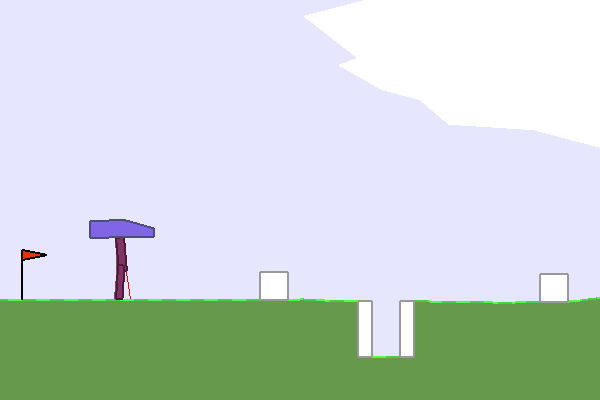

In [15]:
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))

In [6]:
print('Observation Spec:')
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Observation Spec:
Box(-inf, inf, (24,), float32)
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf]
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]


In [7]:
print('Action Spec:')
print(env.action_space)

Action Spec:
Box(-1.0, 1.0, (4,), float32)


In [8]:
print('Reward Spec:')
print(env.reward_range)

Reward Spec:
(-inf, inf)


## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode. Several episodes are run, creating an average return.

The following function computes the average return of a policy, given the policy, environment, and a number of episodes.


In [9]:
def compute_avg_return(environment, policy, num_episodes=10):
    

    total_return = 0.0
    for _ in range(num_episodes):

        observation = environment.reset()
        episode_return = 0.0
        done = False
        while not done:
            action = policy(observation)
            observation, reward, done, info = environment.step(action)
            episode_return += reward
            total_return += episode_return

    avg_return = total_return / num_episodes
    return avg_return

In [10]:
def random_policy(observation):
    return env.action_space.sample()

Running this computation on the `random_policy` shows a baseline performance in the environment.

In [11]:
compute_avg_return(env, random_policy, num_episodes=10)

-42084.67081058497

## Visualization


### Videos

In [12]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

Now iterate through a few episodes of the Cartpole game with the agent. The underlying Python environment (the one "inside" the TensorFlow environment wrapper) provides a `render()` method, which outputs an image of the environment state. These can be collected into a video.

In [13]:
def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
    filename = filename + ".mp4"
    with imageio.get_writer(filename, fps=fps) as video:
        for _ in range(num_episodes):
            observation = env.reset()
            done = False
            video.append_data(env.render(mode='rgb_array'))
            while not done:
                action = policy(observation)
                observation, reward, done, info = env.step(action)
                video.append_data(env.render(mode='rgb_array'))
    return embed_mp4(filename)


In [14]:
create_policy_eval_video(random_policy, "random-agent", num_episodes=1)